Columns in the dataset:
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Missing values in dataset:
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Data types after encoding:
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

Model Mean Absolute Error: 0.51
Model saved as 'happiness_model_gboost.pkl'


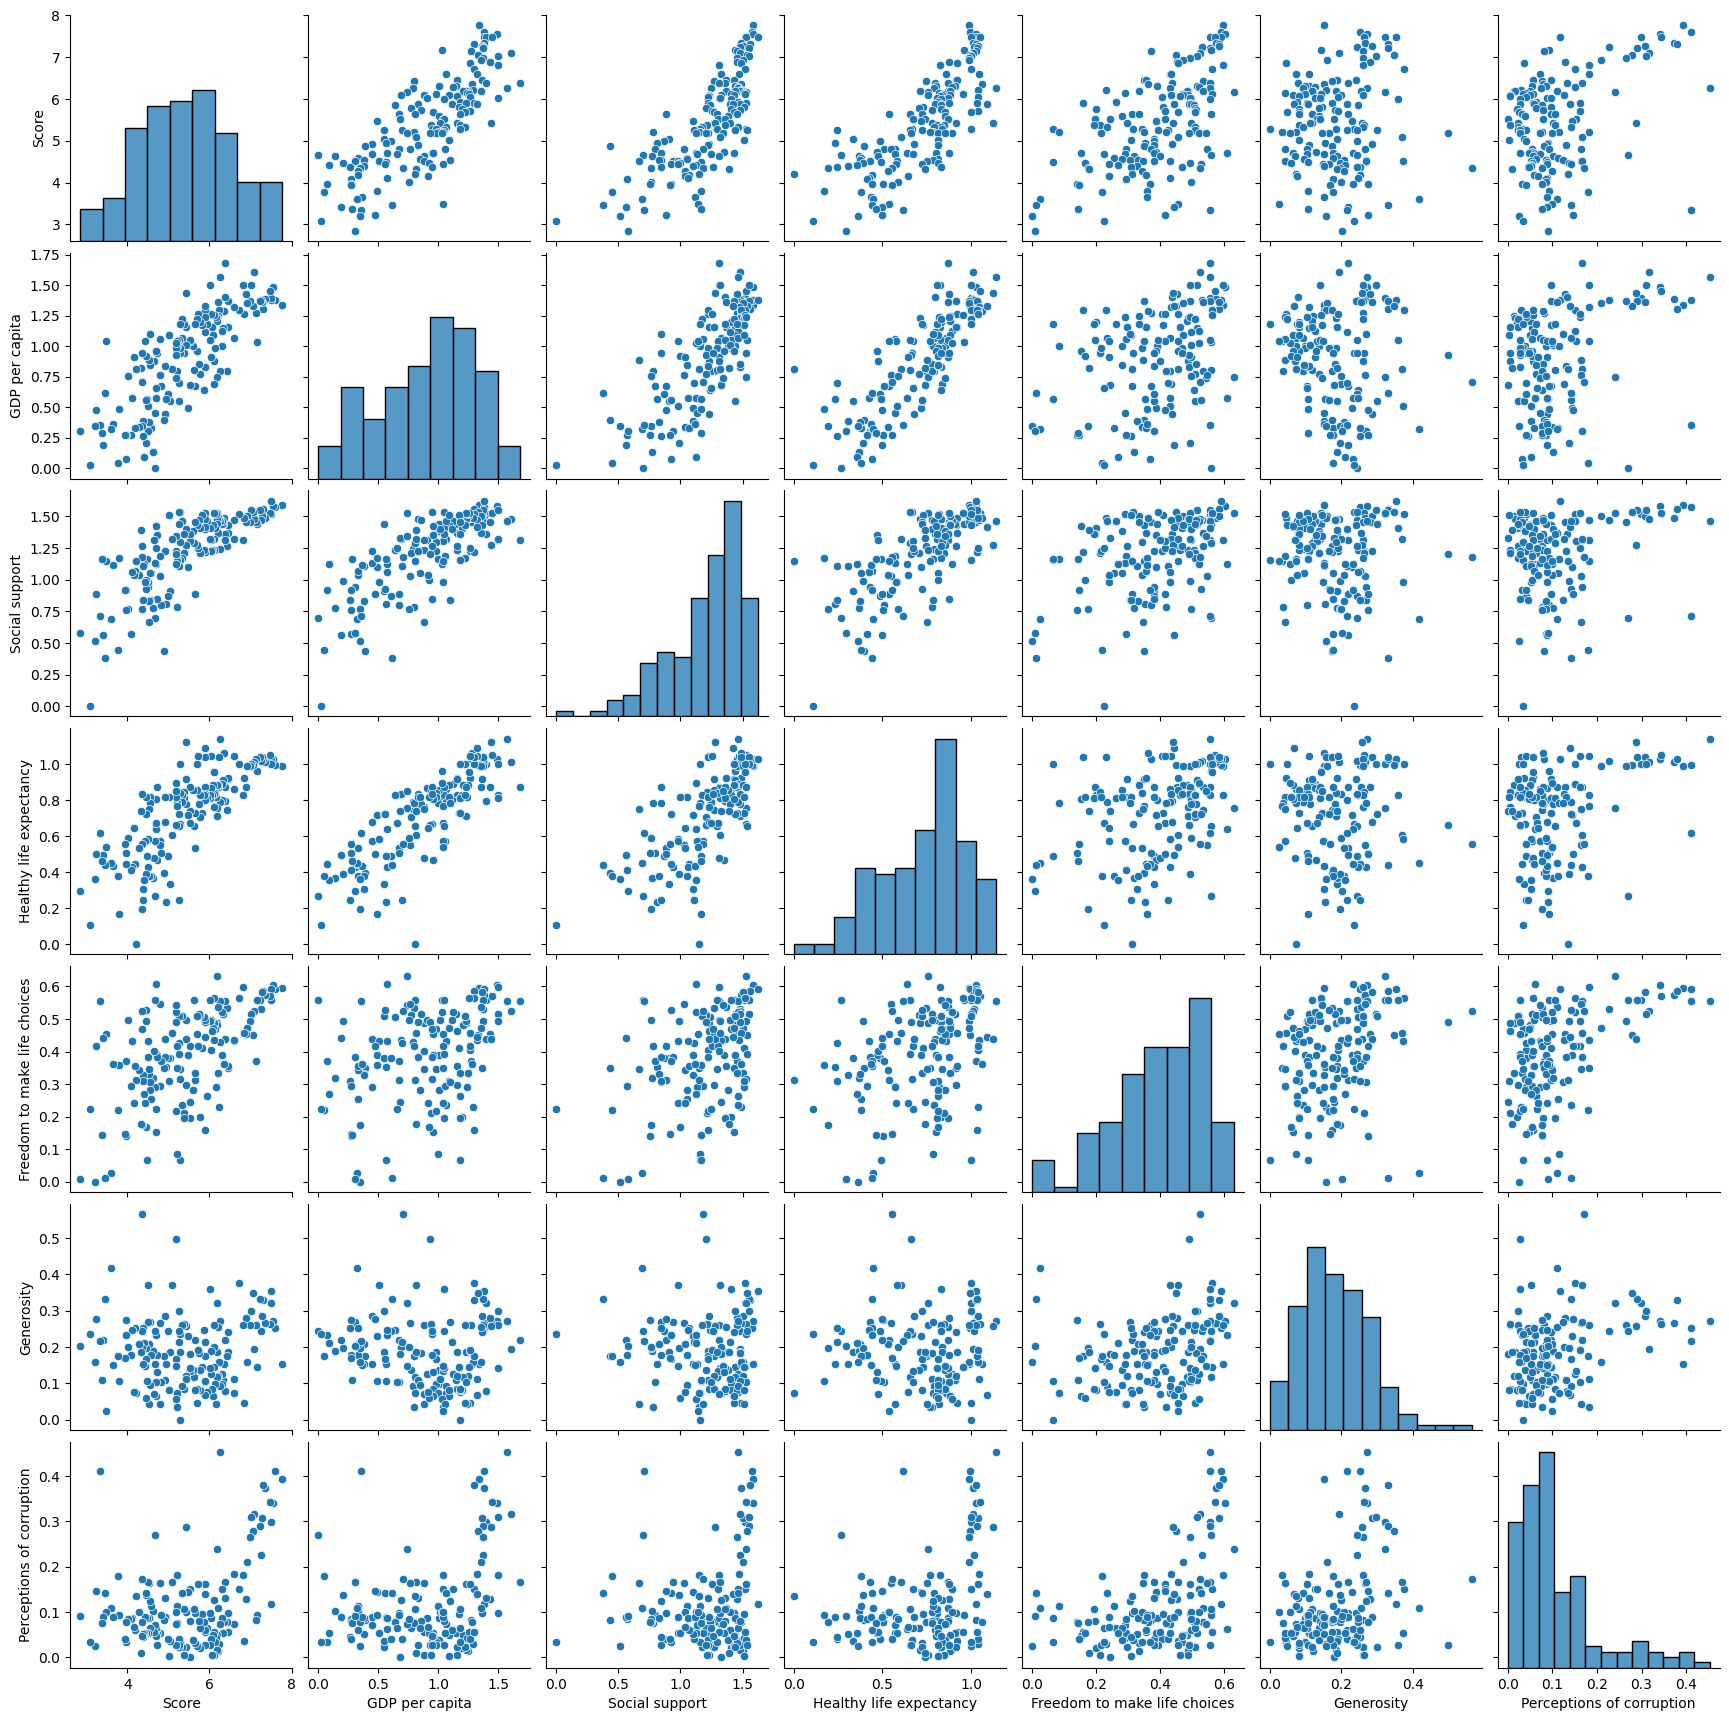

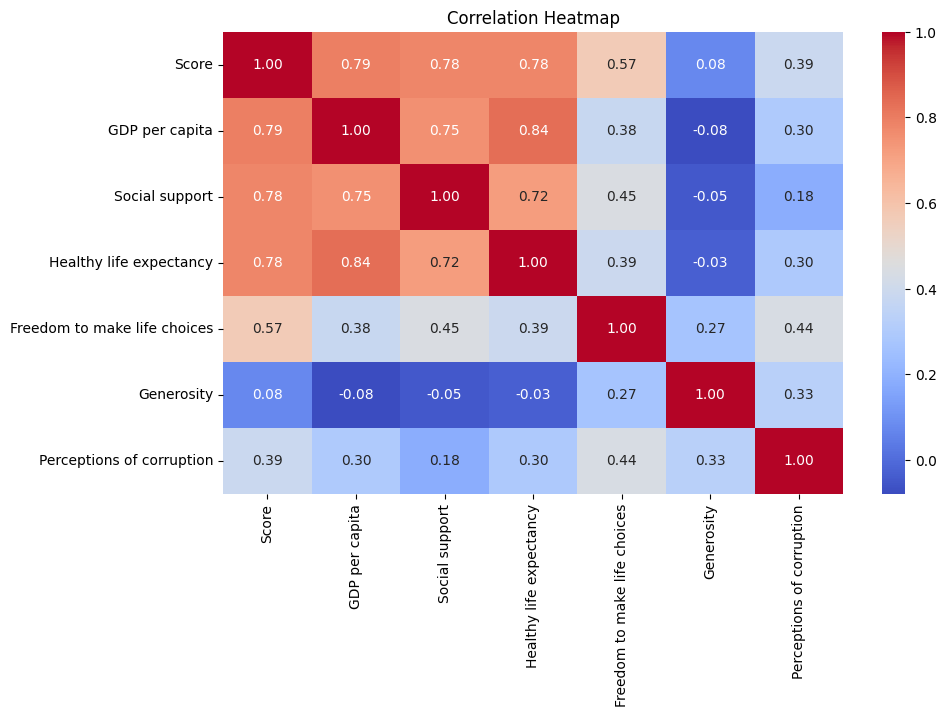


Prediction for the first test sample: [5.95127342]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset (Specify tab separator)
df = pd.read_csv('2019.csv', sep='\t')  # Adjust the file path as needed

# Step 2: Clean up column names (strip extra spaces)
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Columns in the dataset:")
print(df.columns)

# Step 3: Data Preprocessing
target_column = 'Score'  # Adjust if needed
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

columns_to_drop = ['Country or region', 'Overall rank']  # Drop identifiers
df = df.drop(columns=columns_to_drop)

X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Encode non-numeric columns if present
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Check data types after encoding
print("\nData types after encoding:")
print(X.dtypes)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nModel Mean Absolute Error: {mae:.2f}")

# Step 7: Save the model
with open('happiness_model_gboost.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved as 'happiness_model_gboost.pkl'")

# Optional: Pairplot
sns.pairplot(df)
plt.show()

# Optional: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 8: Load and predict (with feature names preserved)
with open('happiness_model_gboost.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

sample_data = X_test.iloc[[0]]  # Keep DataFrame format to preserve column names
prediction = loaded_model.predict(sample_data)
print(f"\nPrediction for the first test sample: {prediction}")
